/home/msuchoa/ufam/controle/provaFinal/.conda/lib/python3.11/site-packages/control/timeresp.py:1117: RuntimeWarning: overflow encountered in matmul
  xout[:, i] = (Ad @ xout[:, i-1]
/home/msuchoa/ufam/controle/provaFinal/.conda/lib/python3.11/site-packages/control/timeresp.py:1117: RuntimeWarning: invalid value encountered in matmul
  xout[:, i] = (Ad @ xout[:, i-1]


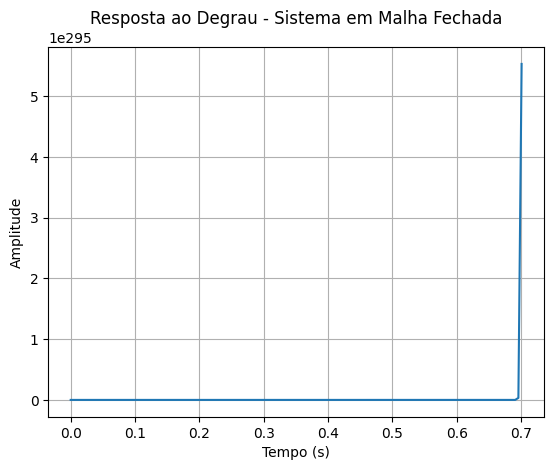

In [4]:
import numpy as np
import control
import matplotlib.pyplot as plt

# Função de transferência original
num = [22, 0]
den = [1, 5, 26, 33]
G = control.tf(num, den)

# Adicionando um integrador para obter erro de regime nulo
G_aug = control.tf(G.num[0][0], np.polymul(G.den[0][0], [1, 0]))

# Convertendo para representação em espaço de estados
G_aug_ss = control.tf2ss(G_aug)

# Especificações de desempenho
ts = 1.0  # Tempo de acomodação (segundos)
Mp = 0.05  # Sobressinal máximo (5%)

# Calculando os polos desejados
zeta = -np.log(Mp) / np.sqrt(np.pi**2 + np.log(Mp)**2)
wn = 4.6 / (zeta * ts)
p1 = -zeta * wn + 1j * wn * np.sqrt(1 - zeta**2)
p2 = -zeta * wn - 1j * wn * np.sqrt(1 - zeta**2)
p3 = -5 * zeta * wn

# Polinômio característico desejado
des_char_poly = np.poly([p1, p2, p3])

# Calculando os coeficientes do controlador
K = control.acker(G_aug_ss.A, G_aug_ss.B, des_char_poly)

# Função de transferência do controlador
Gc_ss = control.ss(G_aug_ss.A - G_aug_ss.B @ K, G_aug_ss.B, G_aug_ss.C, G_aug_ss.D)
Gc = control.ss2tf(Gc_ss)

# Sistema em malha fechada
sys_cl = control.feedback(G_aug * Gc, 1)

# Plotando a resposta ao degrau do sistema em malha fechada
t = np.linspace(0, 5, 1000)
_, y = control.step_response(sys_cl, T=t)

plt.figure()
plt.plot(t, y)
plt.title('Resposta ao Degrau - Sistema em Malha Fechada')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()